In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import data
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola, try_all_threshold, threshold_local)
from skimage.filters import try_all_threshold
from scipy.ndimage import gaussian_filter


In [4]:
path = "E:\\Sem5\\Raw\\Plate_data\\Old\\2.jpg"

df = cv2.imread(path)
print(df.shape)

(303, 472, 3)


(303, 472, 3)
(303, 472)


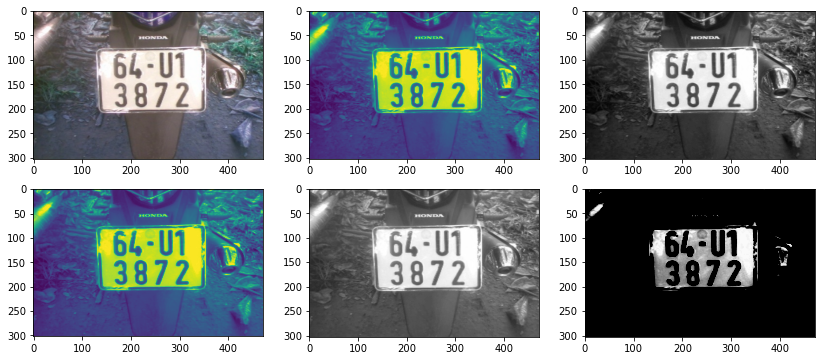

In [35]:
plt.figure(figsize= (14, 6))

plt.subplot(231)
plt.imshow(df, aspect='auto')
print(df.shape)


df2 = cv2.cvtColor(df, cv2.COLOR_RGBA2GRAY)
plt.subplot(232)
plt.imshow(df2, aspect='auto')
print(df2.shape)


plt.subplot(233)
plt.imshow(df2, aspect='auto', cmap='gray')

plt.subplot(235)
plt.imshow(df2, aspect = 'auto', cmap='gray' , vmin=0, vmax = 255)
# cv2.imshow('grayscale_CV',df2)
# cv2.waitKey()

plt.subplot(236)
plt.imshow(df2, aspect = 'auto', cmap = 'gray',  vmin = 210, vmax = 255)


plt.subplot(234)
df4 = cv2.cvtColor(df, cv2.COLOR_BGR2RGB)
df4 = cv2.cvtColor(df4, cv2.COLOR_RGB2GRAY)
plt.imshow(df4)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


<Figure size 864x432 with 0 Axes>

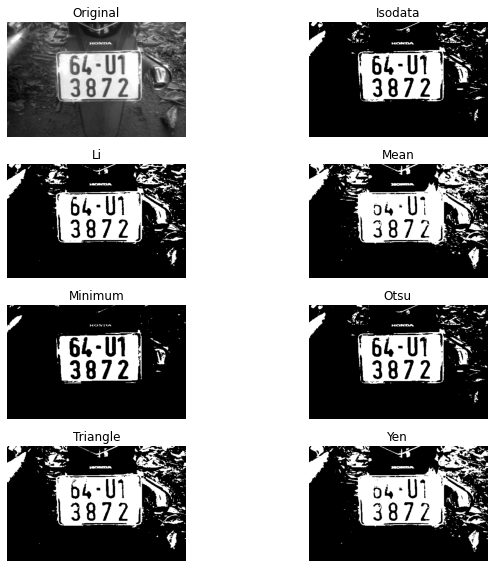

In [6]:
# img = data.page()
# print(img.shape)
# cv2.imshow('a', img)
# cv2.waitKey()
plt.figure(figsize= (12,6))
# plt.subplot(121)
# plt.imshow(img, aspect = 'auto')
# plt.subplot(122)
# plt.imshow(img, cmap = 'gray', aspect = 'auto')

# try_all_threshold(img, figsize=(10, 8), verbose = True)

fig, ax = try_all_threshold(df2, figsize=(10,8), verbose=True)

# plt.show()

Text(0.5, 1.0, '(303, 472)')

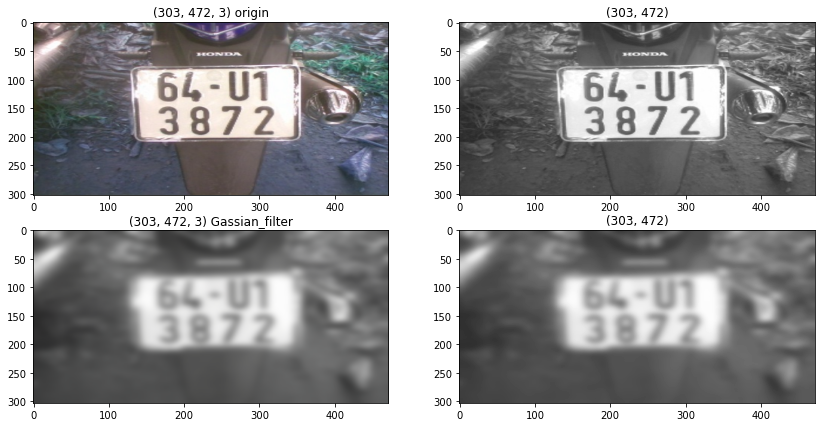

In [7]:
plt.figure(figsize=(14,7))
plt.subplot(221)
plt.imshow(df, aspect = 'auto')
plt.title(str(df.shape) + ' origin')

plt.subplot(223)
gs = gaussian_filter(df, sigma=5)
plt.imshow(gs, aspect = 'auto')
plt.title(str(gs.shape) + " Gassian_filter")

plt.subplot(222)
gc = cv2.cvtColor(df, cv2.COLOR_RGB2GRAY)
plt.imshow(gc, cmap =  'gray', aspect = 'auto', vmin = 0, vmax = 255)
plt.title(str(gc.shape))

plt.subplot(224)
gcg = gaussian_filter(gc, sigma = 5)
plt.imshow(gcg, aspect = 'auto', cmap = 'gray', vmin = 0, vmax = 255)
plt.title(str(gcg.shape))

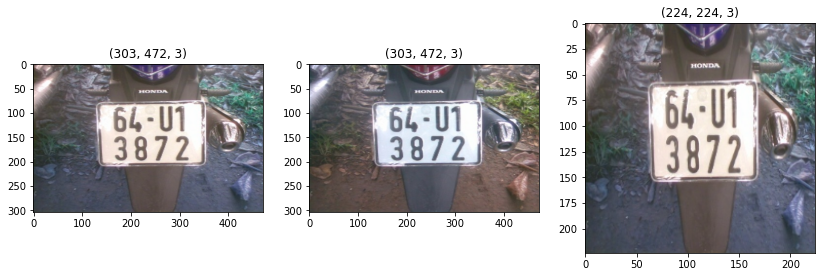

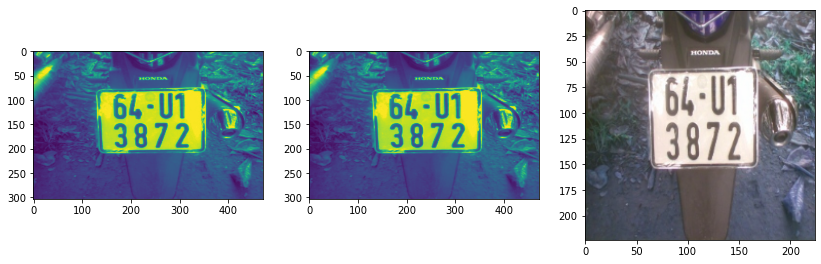

In [8]:
img = cv2.imread(path)

plt.figure(figsize = ( 14, 7) )
plt.subplot(131)
plt.imshow(img)
plt.title(str(img.shape))
# 
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(132)
plt.imshow(img2)
plt.title(str(img2.shape))

plt.subplot(133)
img3 = cv2.resize(img, (224, 224))
plt.imshow(img3)
plt.title(str(img3.shape))
plt.show()

plt.figure(figsize=(14,7))

plt.subplot(131)
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img1)

plt.subplot(132)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2)

img4 = img3 /  255
plt.subplot(133)
plt.imshow(img4)
# print(img3)
# print(img4)


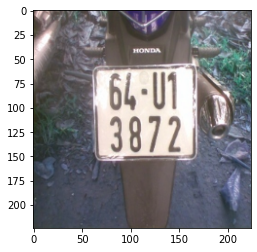

In [9]:
plt.imshow(img3)

1.5577557755775577


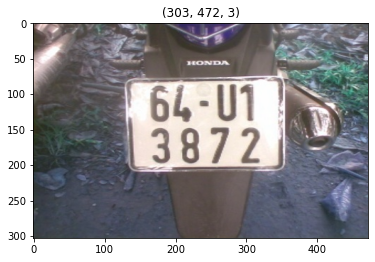

In [10]:
t_img = cv2.imread(path)
plt.imshow(t_img)
plt.title(str(t_img.shape))

ratio = 1.0 * max(t_img.shape[:2]) / min(t_img.shape[:2]) 
print(ratio)

In [11]:
Dmin = 256; Dmax = 608
side = int(ratio * Dmin)
print('side: ',side)
bound_dim = min(side, Dmax)
print('bound_dim: ',bound_dim)

# (303, 472) - scale to ratio 1.55
# (256, 608) 
 

side:  398
bound_dim:  398


In [12]:
min_dim = min(t_img.shape[:2])
print('t_img_shape:',t_img.shape[:2])
print('min_dim: ',min_dim)

factor = 1.0 * bound_dim / min_dim
print('factor: ', factor)

t_img_shape: (303, 472)
min_dim:  303
factor:  1.3135313531353134


In [13]:
w, h = (np.array(t_img.shape[1::-1], dtype = float) * factor).astype(int)
print(w, h)

619 398


In [14]:
print(np.array(t_img.shape[1::-1], dtype = float))

[472. 303.]


In [15]:
print(t_img.shape)
print((np.array(t_img.shape[:2:], dtype = float) * factor).astype(int))

(303, 472, 3)
[398 619]


Text(0.5, 1.0, '(398, 619, 3)')

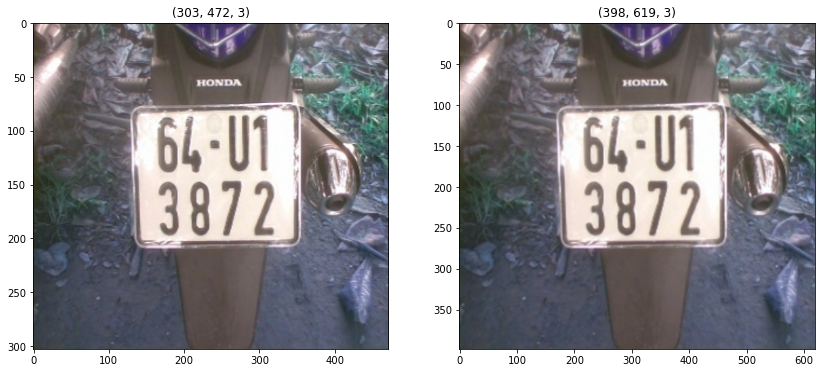

In [16]:
plt.figure(figsize=(14,6))
Iresize = cv2.resize(t_img, dsize = (w,h) )
plt.subplot(121)
plt.imshow(t_img, aspect = 'auto')
plt.title(str(t_img.shape) )
plt.subplot(122)
plt.imshow(Iresize, aspect = 'auto' )
plt.title(str(Iresize.shape))


Text(0.5, 1.0, '(398, 619, 3)')

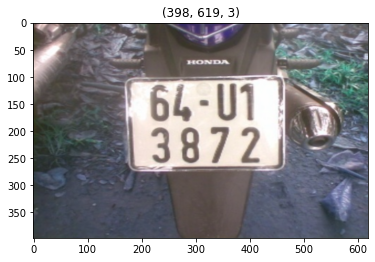

In [17]:
T = Iresize.copy()
plt.imshow(T)
plt.title(str(T.shape))

In [18]:
T = T.reshape( (1, T.shape[0], T.shape[1], T.shape[2] ))
print(T.shape)

(1, 398, 619, 3)


Text(0.5, 1.0, '(398, 619, 3)')

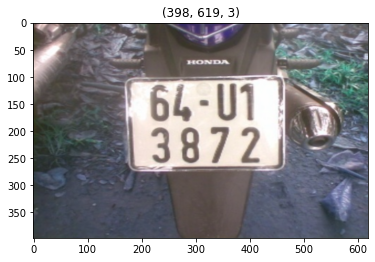

In [19]:
plt.imshow(T[0])
plt.title(str(T[0].shape))

In [20]:
from os.path import splitext, basename
from keras.models import model_from_json

try:
    model_path = splitext("wpod-net.json")[0]
    print(model_path)
    with open('%s.json' % model_path, 'r') as json_file:
        model_json = json_file.read()

    model = model_from_json(model_json, custom_objects={})
    model.load_weights('%s.h5' % model_path)
    print('load successfully')

except Exception as e:
    print(e)

wpod-net
load successfully


In [21]:
Yr = model.predict(T)

In [22]:
Yr.shape

(1, 24, 38, 8)

In [23]:
np.squeeze(Yr).shape

(24, 38, 8)

In [24]:
net_stride = 2**4
print(net_stride)

16


In [25]:
side = ( (208 + 40) / 2) / net_stride
print(side)

7.75
